In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics 

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "input" 
entries = os.listdir(path) 
for entry in entries:
    print(entry)

.ipynb_checkpoints
gender_submission.csv
test.csv
train.csv


In [3]:
train_data = pd.read_csv("input/train.csv")
test_data = pd.read_csv("input/test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

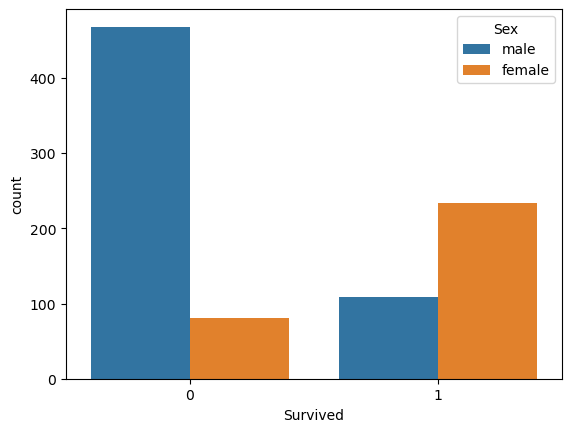

In [13]:
sns.countplot(data=train_data, x="Survived", hue="Sex")

In [14]:
train_data_object = train_data.select_dtypes(include=[object])
for x in train_data_object.columns:
    print("unique values in each columns: ", x, ":", len(train_data_object[x].unique()))

unique values in each columns:  Name : 891
unique values in each columns:  Sex : 2
unique values in each columns:  Ticket : 681
unique values in each columns:  Cabin : 148
unique values in each columns:  Embarked : 4


In [15]:
# drop features
train_data = train_data.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1)

In [16]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# replacing the missing values in "Age" column with mean value
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)

In [18]:
# replacing the missin values in "Embarked" column with mode
train_data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [19]:
train_data["Embarked"].fillna("S", inplace=True)

In [20]:
train_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train_data.replace({"Sex": {"male":0, "female": 1}, "Embarked": {"S": 0, "C":1, "Q":2}}, inplace=True)

In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [23]:
X = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,3,1,29.699118,0,2,15.2458,1
439,2,0,31.000000,0,0,10.5000,0
817,2,0,31.000000,1,1,37.0042,1
378,3,0,20.000000,0,0,4.0125,1
491,3,0,21.000000,0,0,7.2500,0
...,...,...,...,...,...,...,...
835,1,1,39.000000,1,1,83.1583,1
192,3,1,19.000000,1,0,7.8542,0
629,3,0,29.699118,0,0,7.7333,2
559,3,1,36.000000,1,0,17.4000,0


In [26]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,0,29.699118,0,0,14.4583,1
648,3,0,29.699118,0,0,7.5500,0
278,3,0,7.000000,4,1,29.1250,2
31,1,1,29.699118,1,0,146.5208,1
255,3,1,29.000000,0,2,15.2458,1
...,...,...,...,...,...,...,...
780,3,1,13.000000,0,0,7.2292,1
837,3,0,29.699118,0,0,8.0500,0
215,1,1,31.000000,1,0,113.2750,1
833,3,0,23.000000,0,0,7.8542,0


In [27]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [28]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [29]:
stand_scaler = StandardScaler()
X_train = stand_scaler.fit_transform(X_train)
X_test = stand_scaler.fit_transform(X_test)

In [30]:
X_train

array([[ 0.81925059,  1.37207547, -0.00282437, ...,  1.95926403,
        -0.33167904,  0.99748327],
       [-0.38096838, -0.72882288,  0.09662937, ..., -0.47741019,
        -0.42640542, -0.56341363],
       [-0.38096838, -0.72882288,  0.09662937, ...,  0.74092692,
         0.10261958,  0.99748327],
       ...,
       [ 0.81925059, -0.72882288, -0.00282437, ..., -0.47741019,
        -0.48162887,  2.55838016],
       [ 0.81925059,  1.37207547,  0.47888431, ..., -0.47741019,
        -0.28868112, -0.56341363],
       [-0.38096838, -0.72882288,  2.31370804, ...,  0.74092692,
         0.14245584, -0.56341363]])

In [31]:
X_test

array([[ 0.86022947, -0.77344314,  0.01161871, ..., -0.46006628,
        -0.39903373,  1.03790878],
       [ 0.86022947, -0.77344314,  0.01161871, ..., -0.46006628,
        -0.54333564, -0.5917901 ],
       [ 0.86022947, -0.77344314, -1.78311878, ...,  0.88996427,
        -0.09267286,  2.66760766],
       ...,
       [-1.50871015,  1.29291987,  0.11447479, ..., -0.46006628,
         1.66506862,  1.03790878],
       [ 0.86022947, -0.77344314, -0.5180564 , ..., -0.46006628,
        -0.53698145, -0.5917901 ],
       [ 0.86022947, -0.77344314, -0.834322  , ..., -0.46006628,
        -0.53289154, -0.5917901 ]])

In [33]:
model = svm.SVC(kernel = "linear")

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=0, shuffle=True)
val = cross_val_score(model, X, y, cv=cv).mean()
val

0.7867553825874082

In [36]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
y_pred = model.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7877094972067039


In [38]:
test_data_matcher = test_data["PassengerId"]

In [39]:
# prediction on test.csv

test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)
test_data["Embarked"].fillna("S", inplace=True)
test_data = test_data.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1)
test_data.replace({"Sex": {"male": 0, "female": 1}, "Embarked": {"S": 0, "C":1, "Q": 2}}, inplace=True)

In [40]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [41]:
test_data.shape

(418, 7)

In [42]:
test_pred = model.predict(test_data)
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
result = pd.DataFrame(test_data_matcher)
print(result.head())

   PassengerId
0          892
1          893
2          894
3          895
4          896


In [44]:
result.insert(1, "Survived", test_pred, True)
result["Survived"] = pd.to_numeric(result["Survived"], downcast = "integer")
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<AxesSubplot:xlabel='Survived', ylabel='count'>

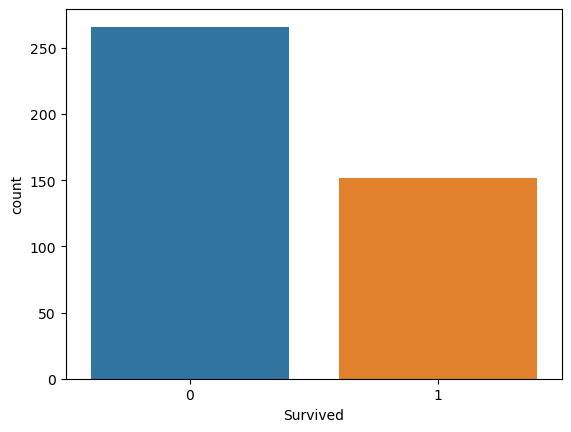

In [45]:
result.to_csv("out_result.csv", index=False)
out_data = pd.read_csv("out_result.csv")
sns.countplot(data=out_data, x="Survived")